In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


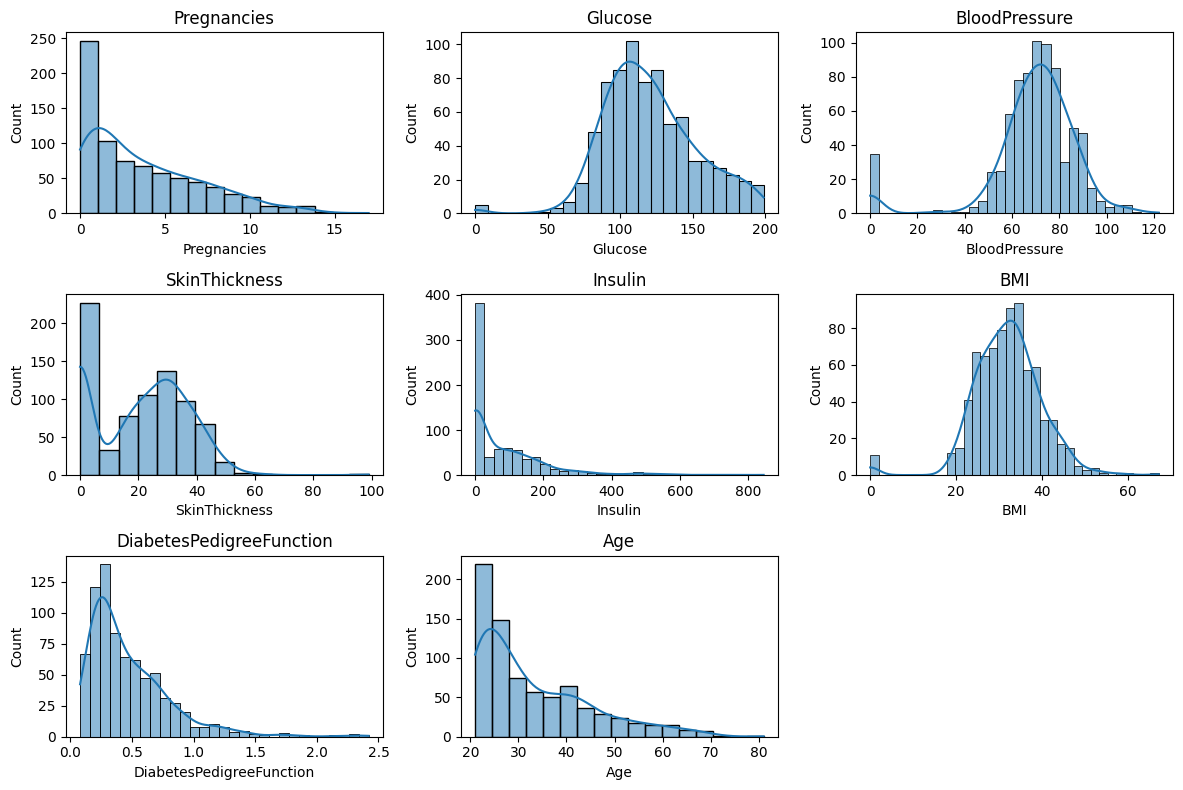

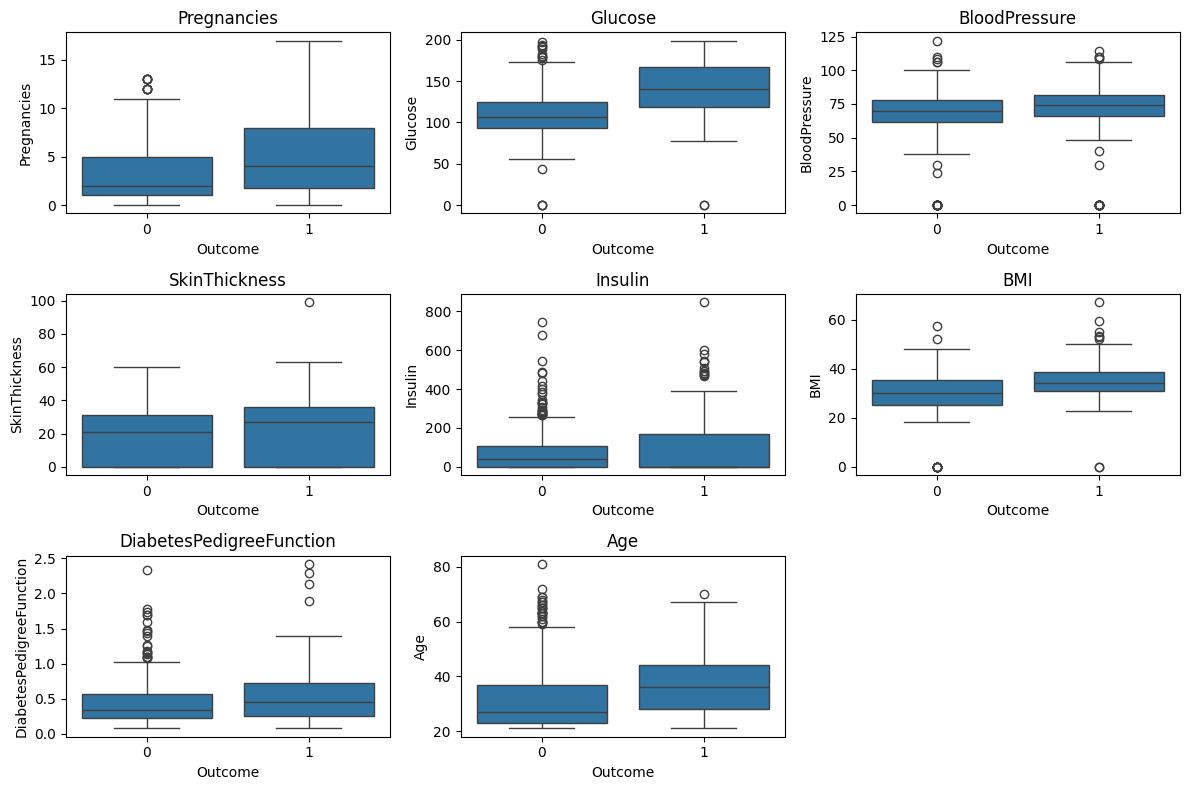

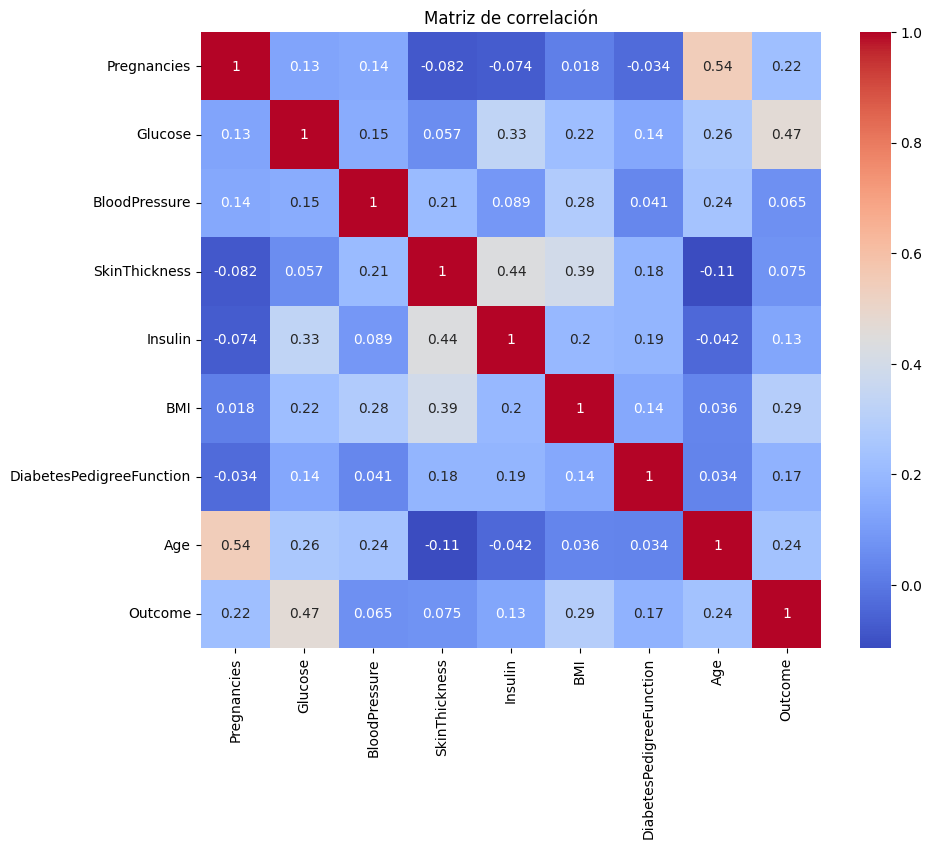

In [4]:
# Visualización de la distribución de cada variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Relación entre las variables y la variable objetivo (Outcome)
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

# Correlaciones entre las variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [5]:
# Verificar valores nulos en el DataFrame df
missing_values = df.isnull().sum()

# Mostrar los valores nulos por columna
print("Valores nulos por columna:")
print(missing_values)

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Reemplazamos valores atipicos con K vecinos
# Copiar el DataFrame para evitar modificar el original
df_imputed = df.copy()

# Reemplazar ceros en las columnas 'BloodPressure', 'Glucose' y 'BMI' con NaN
columns_to_impute = ['BloodPressure', 'Glucose', 'BMI']
for column in columns_to_impute:
    df_imputed[column] = df_imputed[column].replace(0, np.nan)

# Inicializar el imputador KNN
imputer = KNNImputer(n_neighbors=5)  # Especifica el número de vecinos más cercanos

# Aplicar el imputador a los datos
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

In [7]:
# Eliminar la variable 'SkinThickness'
df_imputed.drop(columns=['SkinThickness'], inplace=True)

# Imprimir el DataFrame resultante
print(df_imputed)

     Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0              6    148.0           72.0        0  33.6   
1              1     85.0           66.0        0  26.6   
2              8    183.0           64.0        0  23.3   
3              1     89.0           66.0       94  28.1   
4              0    137.0           40.0      168  43.1   
..           ...      ...            ...      ...   ...   
763           10    101.0           76.0      180  32.9   
764            2    122.0           70.0        0  36.8   
765            5    121.0           72.0      112  26.2   
766            1    126.0           60.0        0  30.1   
767            1     93.0           70.0        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..             

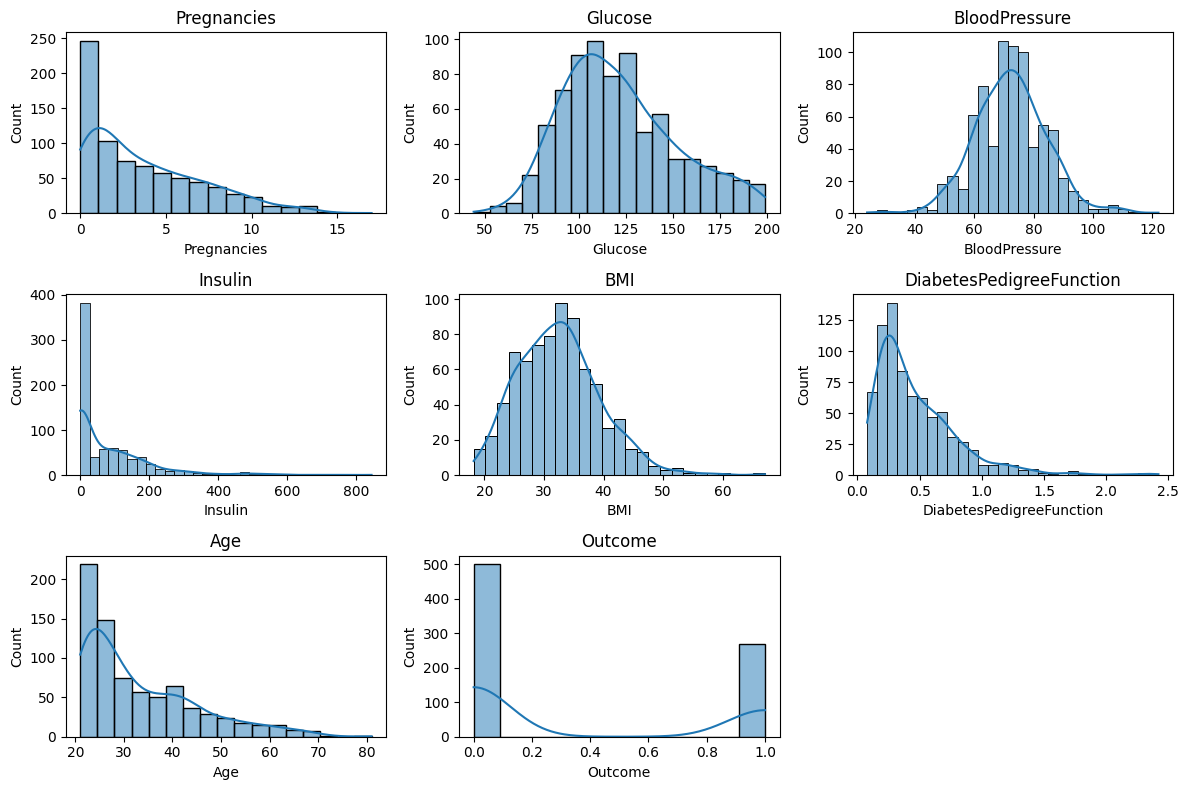

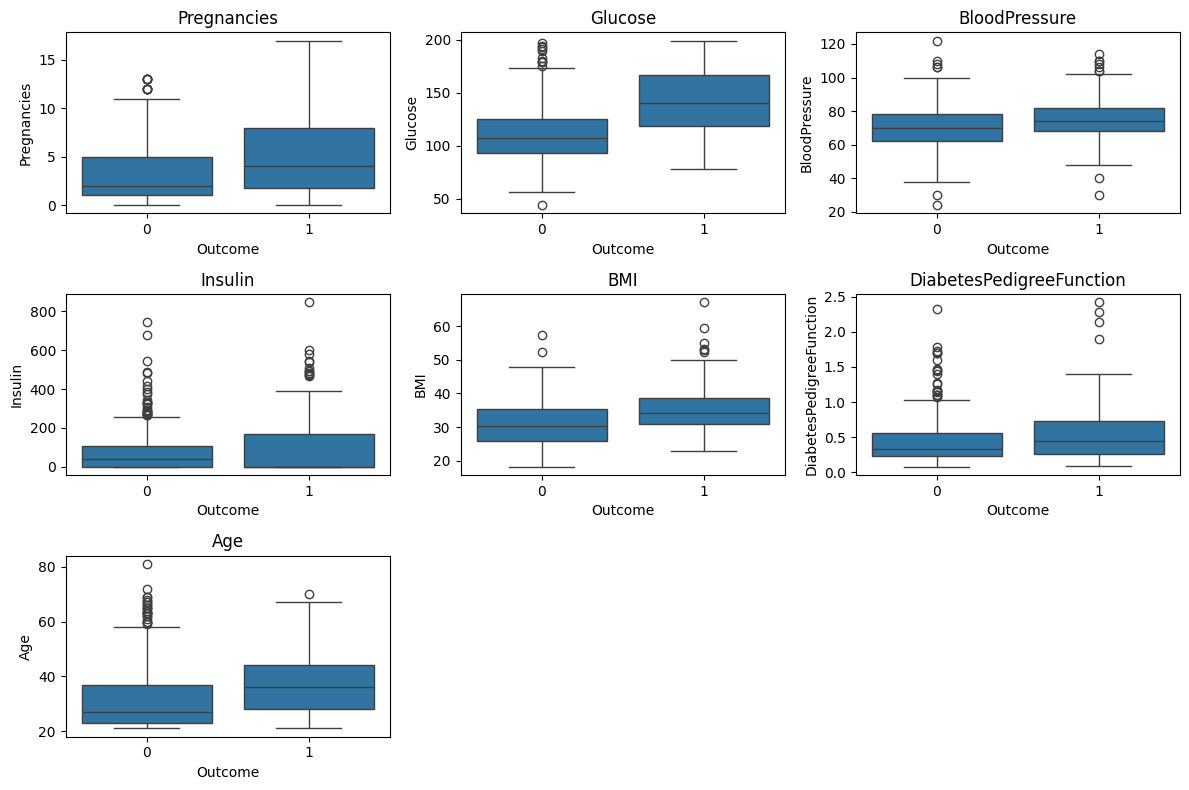

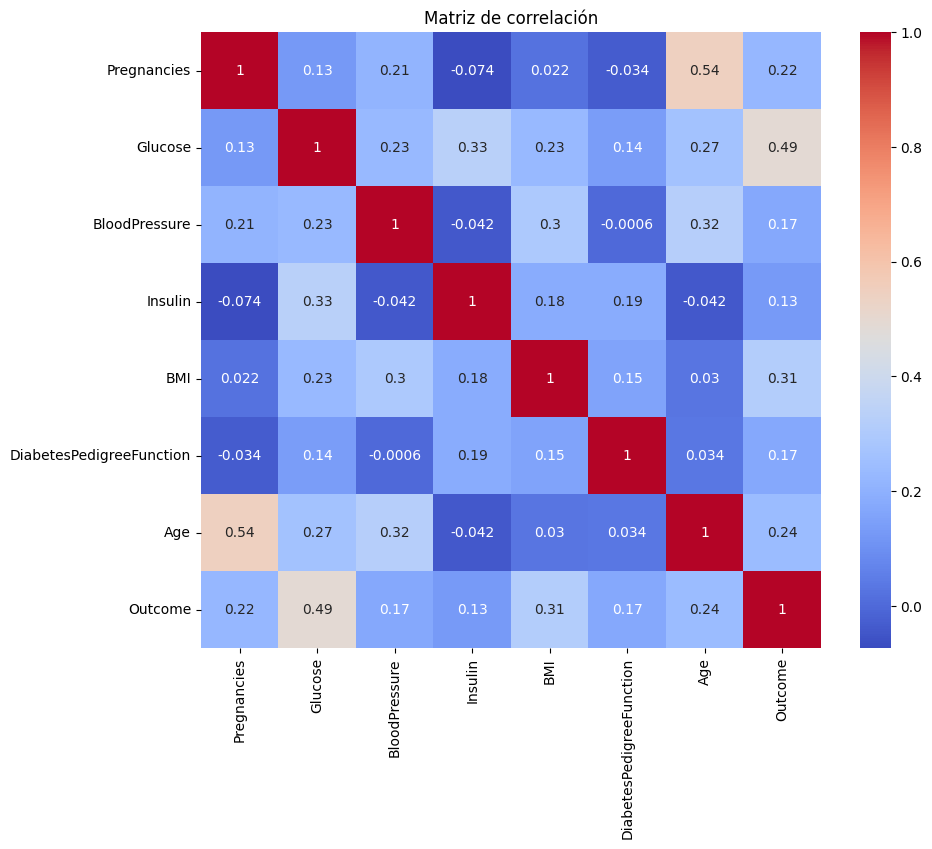

In [8]:
# Visualización de la distribución de cada variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_imputed.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_imputed[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Relación entre las variables y la variable objetivo
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_imputed.columns[:-1]):  # Excluye la columna de resultado ('Outcome')
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=column, data=df_imputed)
    plt.title(column)
plt.tight_layout()
plt.show()

# Correlaciones entre las variables
correlation_matrix = df_imputed.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [9]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

# Mostrar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Exactitud del modelo: 0.7077922077922078
Matriz de confusión:
[[73 26]
 [19 36]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



RANDOM FOREST

Implementamos el modelo con 100 arboles y evaluamos su rendimiento.

In [10]:
# Iniciamos el modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
rf_clf.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Exactitud del modelo Random Forest:", accuracy_rf)

# Mostramos matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión:")
print(conf_matrix_rf)

# Mostramos informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_rf))

Exactitud del modelo Random Forest: 0.7662337662337663
Matriz de confusión:
[[79 20]
 [16 39]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



OBSERVACIONES

Vemos una mayor exactitud del modelo random foresto (76%)

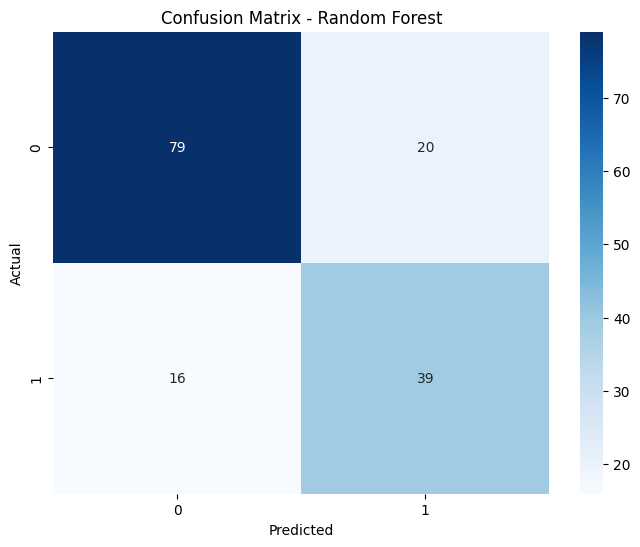

In [11]:
# Crear una figura
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

plt.show()

GUARDAMOS EL MODELO EN UNA CARPETA 


In [14]:
# iMPORTAMOS LA BIBLIOTECA JOBLIB
import joblib
import os

In [18]:
# Variable modelo y ruta
modelo_diabetes = "random_forest_regressor_100_trees_seed_100.pkl" 
ruta_carpeta = ('C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Random Forest/models') 

# Si la carpeta no existe, crearla
if not os.path.exists(ruta_carpeta):
    os.makedirs(ruta_carpeta)
    print("La carpeta se ha creado correctamente.")
else:
    print("La carpeta ya existe.")

# Guardar el modelo en la carpeta especificada
ruta_modelo = os.path.join(ruta_carpeta, modelo_diabetes)
joblib.dump(modelo_diabetes, open(ruta_modelo, "wb"))


La carpeta ya existe.
